In [ ]:
!pip install pythainlp[full] 
!pip install pandas 
!pip install epitran
!pip install sklearn_crfsuite
!pip install tensorflow deepcut
!pip install attacut

In [62]:
import pandas as pd 
df = pd.read_csv('/content/teamchadchart6.csv',encoding='utf-8-sig')
df_full = df.dropna()
df_total = df_full[['comment','district','state']]
df_totals = pd.DataFrame(df_total)
df_totals 

,comment,district,state
0,เวลาฝนตกจะเกิดน้ำท่วมขังในซอยทำให้ไม่สามารถเข้...,จอมทอง,รอรับเรื่อง
1,เรื่องเสียงดังจากร้านอาหาร,คลองเตย,รอรับเรื่อง
2,ซอยสุขุมวิท 63 (เอกมัย) ไฟส่องสว่าง มีไฟหลายดว...,วัฒนา,รอรับเรื่อง
3,ถนนสุขุมวิท (เอกมัย) ทางเดินเท้า ช่วงเองมัยซอย...,วัฒนา,รอรับเรื่อง
4,ต้นไม้,จอมทอง,รอรับเรื่อง
...,...,...,...
79496,ไม่เคยท่วม แต่หลังๆ มาฝนตกนิดเดียวก็ท่วมง่าย,วัฒนา,ส่งเรื่องแล้ว
79520,น้ำในคลองประเวศน์ฯ สูงเมื่อไหร่ ซอยนี้จะท่วมทันที,ลาดกระบัง,เสร็จสิ้น
79524,จุดเสี่ยงน้ำท่วม จุดเฝ้าระวัง กรณีเขตยกเครื่อง...,ตลิ่งชัน,เสร็จสิ้น
79526,มีน้ำท่วมบ้าง เพราะพื้นถนนสูงกว่าถนนวิภาวดี ปร...,จตุจักร,เสร็จสิ้น


<h1> function tokenizer 

In [63]:
from pythainlp import word_tokenize

def tokenizes(s):
  s_cut = ''
  s_cut = word_tokenize(s)
  return s_cut

<h1> function clean text 

In [64]:
import re
import string
from pythainlp.corpus.common import thai_stopwords

def clean_text(txt): 
    txt = str(txt)
    
    # ลบ text ที่อยู่ในวงเล็บ <> ทั้งหมด
    txt = re.sub(r'<.@*?!>','', txt)
    
    # ลบ hashtag
    txt = re.sub(r'#','',txt)

    # ลบ ตัวเลขออก
    txt = re.sub(r'[0-9]+', '', txt)

    txt = re.sub(r'http\S+', '', txt)
    txt = re.sub(r'https\S+', '', txt)

    
    # ลบ เครื่องหมายคำพูด (punctuation)
    for c in string.punctuation:
        txt = re.sub(r'\{}'.format(c),'',txt)
    
    # ลบ separator เช่น \n \t
    txt = ' '.join(txt.split())
      
    return txt

<h1> function remove stopword 

In [65]:
from pythainlp.corpus.common import thai_stopwords

# print(thai_stopwords(),"\n\n")
def rm_stw(txt):
  rm_stw_txt =""
  for i in txt:
    if i not in thai_stopwords():
      rm_stw_txt = rm_stw_txt+i
  return rm_stw_txt

<h1> function edit chearacter order 

In [66]:
import re

from pythainlp import thai_tonemarks

_NORMALIZE_RULE1 = [
    "ะ",
    "ั",
    "็",
    "า",
    "ิ",
    "ี",
    "ึ",
    "่",
    "ํ",
    "ุ",
    "ู",
    "ใ",
    "ไ",
    "โ",
    "ื",
    "่",
    "้",
    "๋",
    "๊",
    "ึ",
    "์",
    "๋",
    "ำ",
]  # เก็บพวกสระ วรรณยุกต์ที่ซ้ำกันแล้วมีปัญหา


_NORMALIZE_RULE2 = [
    ("เเ", "แ"),  # เ เ -> แ
    ("ํ(t)า", "\\1ำ"),
    ("ํา(t)", "\\1ำ"),
    ("([่-๋])([ัิ-ื])", "\\2\\1"),
    ("([่-๋])([ูุ])", "\\2\\1"),
    ("ำ([่-๋])", "\\1ำ"),
    ("(์)([ัิ-ู])", "\\2\\1"),
]  # เก็บพวก พิมพ์ลำดับผิดหรือผิดแป้นแต่กลับแสดงผลถูกต้อง ให้ไปเป็นแป้นที่ถูกต้อง เช่น เ + เ ไปเป็น แ



def normalize(text: str) -> str:
    """
    Thai text normalize

    :param str text: thai text
    :return: thai text
    **Example**::
     >>> print(normalize("เเปลก")=="แปลก") # เ เ ป ล ก กับ แปลก
     True
    """
    for data in _NORMALIZE_RULE2:
        text = re.sub(data[0].replace("t", "[่้๊๋]"), data[1], text)
    for data in list(zip(_NORMALIZE_RULE1, _NORMALIZE_RULE1)):
        text = re.sub(data[0].replace("t", "[่้๊๋]") + "+", data[1], text)
    return text

<h1> function del space


In [67]:
import re
def del_space(txt):
  text = ""
  # text = txt.strip().replace(" ","")
  text = re.sub(r"\s+", "", txt)
  return text

<h1> function remove function word 

In [68]:
from pythainlp.tag import pos_tag 
from pythainlp.tag.tltk import get_ner


def func_word(txt):
  check = ['NOUN','NCMN','NTTL','CNIT','CMTR','CFQC','CVBL','VACT','VSTA','ADJ','NONM','VATT','DONM','ADV','ADVN','ADVI','ADVP','ADVS']
  ls = []
  ls_check = []
  ls = pos_tag(txt)
  for i in ls:
    if i[1] in check:
      ls_check.append(i[0])
    
  return ls_check

def func_word2(txt):
  check = ['NOUN','PROPN','VERB']
  ls = []
  ls_check = ''
  ls = get_ner(txt)
  for i in ls:
    if i[1] in check:
      ls_check = ls_check+i[0]
  return ls_check

<h1> function correct spell word 

In [69]:
import pythainlp 
def spell(s):
  st=""
  st = pythainlp.correct(str(s))
  return st 

<h1> create data_trian

In [70]:
df_train = df_totals.comment
data_train = df_train.apply(clean_text).copy()
data_train = data_train.apply(normalize).copy()
data_train = data_train.apply(rm_stw).copy()
data_train = data_train.apply(del_space).copy()
data_train = data_train.apply(tokenizes).copy()
data_train = data_train.apply(func_word).copy()
data_train

0        [เวลา, ฝนตก, เกิด, น้ำท่วม, ขัง, ซอย, ทำให้, เ...
1                            [เรื่อง, เสียงดัง, ร้านอาหาร]
2        [ซอย, สุขุมวิท, เอกมัย, ไฟ, ส่องสว่าง, มี, ไฟ,...
3        [ถนน, สุขุมวิท, เอกมัย, ทางเดินเท้า, ช่วง, มัย...
4                                                 [ต้นไม้]
                               ...                        
79496                             [ท่วม, ฝนตก, ท่วม, ง่าย]
79520    [น้ำ, คลอง, ประเวศน์, สูง, เมื่อไหร่, ซอย, ท่ว...
79524    [จุด, เสี่ยง, น้ำท่วม, จุด, เฝ้า, ระวัง, กรี, ...
79526    [มี, น้ำท่วม, บ้าง, พื้นถนน, สูง, ถนน, ประ, เมตร]
79532    [ขาด, จัดการ, ขยะ, มีประสิทธิภาพ, ส่งผลให้เกิด...
Name: comment, Length: 78808, dtype: object

<h1> topic data

In [71]:
df_tp = pd.read_csv('/content/data_clustering_.csv')
def clear_na(data):
  print(data.isnull().sum())
  datas = data.dropna()
  return datas

print(df_tp.columns.tolist())

['แสงสว่าง', 'ทางเท้า', 'ถนน', 'ฟุตบาท', 'การกีดขวาง', 'ความสะอาด', 'ท่อระบายน้ำ', 'สายไฟ', 'คลอง', 'ความปลอดภัย', 'การเดินทาง', 'สะพาน', 'น้ำท่วม', 'สัตว์จรจัด', 'แจ้งเรื่อง', 'รบกวน', 'คนเช็ดกระจก', 'คนไร้บ้าน', 'ร้านเหล้าเปิดเกินเวลา', 'อินเทอร์เน็ต', 'ขอบคุณ', 'ทุจริต', 'ติดตามเรื่อง', 'ของหาย', 'น้ำไม่ไหล', 'ห้องน้ำ', 'โรงพยาบาล', 'ภาพถ่าย', 'อนาจาร', 'ป้าย', 'ความรุนแรง', 'ห้องน้ำ.1', 'หม้อแปลงไฟ', 'ควันบุหรี่ ', 'บอท', 'กล้องวงจรปิด', 'ทดสอบระบบ', 'ชำรุด']


In [76]:
df_totals.reset_index(drop=True, inplace=True)

<h1>data dict comment and address

In [77]:
df_ = df_totals.comment
df_ = df_.apply(clean_text).copy()
df_ = df_.apply(normalize).copy()
add = {}
for i,j in enumerate(df_):
  add[j] = df_totals.district[i]


<h1> data dict comment and status 

In [78]:
state = {}
for i,j in enumerate(df_):
  state[j] = df_totals.state[i]


<h1>data dict comment and labels 

In [79]:
data = {}
for i in  df_:
  data[i] = 'อื่นๆ'

s = ''
for i in data:
  for j in topic_dic:
    if j in i:
      if topic_dic[j] not in s:
        s = s + ',' + topic_dic[j]
  if len(s) > 0:
    data[i] = s
  else:
    data[i] = 'อื่นๆ'
  s = ''
d = [] 
l = []
for i in data:
  d.append(i)
  l.append(data[i])
df_topic = pd.DataFrame(list(zip(d,l)),columns=['text','labels'])
df_topic

,text,labels
0,เวลาฝนตกจะเกิดน้ำท่วมขังในซอยทำให้ไม่สามารถเข้...,",น้ำท่วม,แจ้งเรื่อง"
1,เรื่องเสียงดังจากร้านอาหาร,",รบกวน"
2,ซอยสุขุมวิท เอกมัย ไฟส่องสว่าง มีไฟหลายดวงยังด...,",แสงสว่าง,รบกวน"
3,ถนนสุขุมวิท เอกมัย ทางเดินเท้า ช่วงเองมัยซอย ถ...,",ทางเท้า,ถนน,ท่อระบายน้ำ,น้ำท่วม"
4,ต้นไม้,",การกีดขวาง"
...,...,...
65214,ไม่เคยท่วม แต่หลังๆ มาฝนตกนิดเดียวก็ท่วมง่าย,",น้ำท่วม"
65215,น้ำในคลองประเวศน์ฯ สูงเมื่อไหร่ ซอยนี้จะท่วมทันที,",คลอง,น้ำท่วม"
65216,จุดเสี่ยงน้ำท่วม จุดเฝ้าระวัง กรณีเขตยกเครื่อง...,",ความปลอดภัย,น้ำท่วม,ภาพถ่าย"
65217,มีน้ำท่วมบ้าง เพราะพื้นถนนสูงกว่าถนนวิภาวดี ปร...,",ถนน,น้ำท่วม"


In [81]:
df_topic.to_csv('df_labels.csv',index=False)

<h1>create data comment labels and address 

In [ ]:
address = []
for i in add:
  address.append(add[i])
states = []
for i in state:
  states.append(state[i])
df_topic['address'] = address
df_topic['state'] = states
df_topic.to_csv('data_labels_address.csv', index=False)  

<h1> import data labels file

In [ ]:
import pandas as pd 
df_topic = pd.read_csv('/content/data_labels_address.csv')


<h1>Function of calculate describe in data with address


In [ ]:
import matplotlib.pyplot as plt 

ls_add = df_topic.address.unique()

for i in ls_add:
  s = df_topic.labels[df_topic['address']==f'{i}']
  print(s)
  data = {}
  data['อื่นๆ'] = 0 
  for j in s:
    x = j.split(',')
    if x[0] == 'อื่นๆ':
      data['อื่นๆ'] = data['อื่นๆ'] + 1
    for k in x[1:]:
      if k == 'อื่นๆ':
          data['อื่นๆ'] = data['อื่นๆ'] + 1
      if k != 'อื่นๆ':
          if k not in data:
            data[k] = 0
          if k in data:
            data[k] = data[k]+1
  
  names = list(data.keys())
  values = list(data.values())
  data = {'name': names, 'value': values}
  df = pd.DataFrame.from_dict(data)
  df.to_csv(f'เขต{i}.csv',index=False)
  


<h1> Create no labels data for find topic again 

In [ ]:
no_labels = df_topic.text[df_topic['labels']=='อื่นๆ']
df_no_labels = pd.DataFrame(no_labels)
df_no_labels.to_csv('df_no_labels.csv', index=False)  
df = pd.DataFrame(df_no_labels.text)
df 

<h1> prepare data

In [ ]:
df_train = df.text
data_train = df_train.apply(clean_text).copy()
data_train = data_train.apply(normalize).copy()
data_train = data_train.apply(rm_stw).copy()
data_train = data_train.apply(del_space).copy()
data_train = data_train.apply(tokenizes).copy()
data_train = data_train.apply(func_word).copy()
data_train

<h1> find one-gram in data 

In [ ]:
vocab = []
Frequency = {}

for i in data_train:
  for j in i:
    if j not in vocab:
      vocab.append(j)
    if j in vocab:
      if j not in Frequency:
        Frequency[j] = 0
      if j in Frequency:
        Frequency[j] = Frequency[j] + 1

def myFunc(e):
  return e[1]

Frequency_ls_one = list(Frequency.items())
Frequency_ls_one.sort(key=myFunc,reverse=True)
Frequency_ls_one

In [ ]:
text = []
freQ = []
for i in Frequency_ls_one[:500]:
  text.append(i[0])
  freQ.append(i[1])

data_one = {
    'text':text,
    'frequency' :freQ
          }
df_one = pd.DataFrame(data_one)
df_one.to_csv('one_gram.csv', index=False,encoding="TIS-620")  

<h1> read file one-gram for find bi-gram

In [ ]:
df_one = pd.read_csv('/content/one_gram.csv',encoding="TIS-620")
df_one = df_one.text
vocab = []
Frequency = {}
for i in df_one:
  for j in data_train:
    for x,y in enumerate(j):
      if i[0] == y:
        if x-1>=0 and x+1<len(j):
          x2 = j[x-1]+i[0]+j[x+1]
          vocab.append(x2)  
          if x2 not in Frequency:
            Frequency[x2] = 0
          if x2 in Frequency:
            Frequency[x2] = Frequency[x2]+1
        if y not in vocab:
          vocab.append(y)

In [ ]:
Frequency_ls_bi = list(Frequency.items())
Frequency_ls_bi.sort(key=myFunc,reverse=True)
Frequency_ls_bi

In [ ]:
text = []
freQ = []
for i in Frequency_ls_bi[0:500]:
  text.append(i[0])
  freQ.append(i[1])

data_bi= {
    'text':text,
    'frequency' :freQ
          }
df_bi = pd.DataFrame(data_bi)
df_bi.to_csv('bi_gram_v2.csv', index=False,encoding="TIS-620")  


<h1> find tri-gram

In [ ]:
vocab = []
Frequency = {}
for i in df_one:
  for j in data_train:
    for x,y in enumerate(j):
      if i[0] == y:
        if x-2>=0 and x+2<len(j):
          x2 = j[x-2]+j[x-1]+i[0]+j[x+1]+j[x+2]
          if x2 not in Frequency:
            Frequency[x2] = 0
          if x2 in Frequency:
            Frequency[x2] = Frequency[x2]+1
        if y not in vocab:
          vocab.append(y)

In [ ]:
Frequency_ls_tri = list(Frequency.items())
Frequency_ls_tri.sort(key=myFunc,reverse=True)
Frequency_ls_tri

In [ ]:
text = []
freQ = []
for i in Frequency_ls_tri[0:300]:
  text.append(i[0])
  freQ.append(i[1])

data_tri= {
    'text':text,
    'frequency' :freQ
          }
df_tri = pd.DataFrame(data_tri)
df_tri.to_csv('tri_gram_v2.csv', index=False,encoding="utf-8")  

<h1> word cloud

In [ ]:
!wget https://www.f0nt.com/download/sipafonts/THSarabunNew.zip ; unzip THSarabunNew.zip

--2022-07-08 19:30:28--  https://www.f0nt.com/download/sipafonts/THSarabunNew.zip
Resolving www.f0nt.com (www.f0nt.com)... 103.246.18.21, 2401:5700:100:503::1821
Connecting to www.f0nt.com (www.f0nt.com)|103.246.18.21|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.f0nt.com/files/sipafonts/THSarabunNew.zip [following]
--2022-07-08 19:30:30--  https://www.f0nt.com/files/sipafonts/THSarabunNew.zip
Reusing existing connection to www.f0nt.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 434047 (424K) [application/zip]
Saving to: ‘THSarabunNew.zip’

THSarabunNew.zip    100%[===================>] 423.87K   550KB/s    in 0.8s    

2022-07-08 19:30:31 (550 KB/s) - ‘THSarabunNew.zip’ saved [434047/434047]

Archive:  THSarabunNew.zip
  inflating: THSarabunNew Italic.ttf  
   creating: __MACOSX/
  inflating: __MACOSX/._THSarabunNew Italic.ttf  
  inflating: THSarabunNew.ttf        
  inflating: __MACOSX/._THSarabunNew.ttf  
  inflating: TH

In [ ]:
from pythainlp.corpus import thai_stopwords
from pythainlp.tokenize import word_tokenize

def get_text_str(message):
  tokenized =" "
  th_stw = thai_stopwords()
  for i in message:
    token = word_tokenize(i)
    for j in token:
      if j not in thai_stopwords():
        tokenized =tokenized + " " + j
  
  return tokenized


text = get_text_str(df.text)

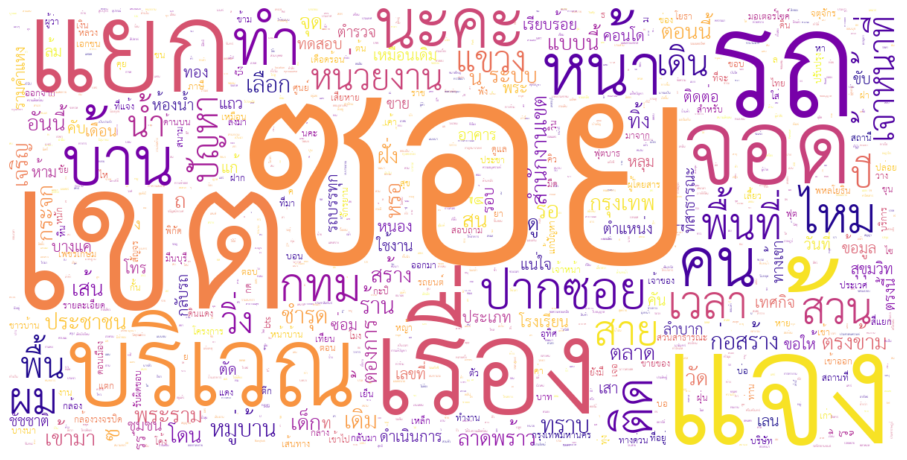

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
regexp = r"[ก-๙a-zA-Z']+"
path = '/content/THSarabunNew.ttf'
wordcloud = WordCloud(
                      font_path=path, 
                      min_font_size=1,
                      background_color="white",
                      width=400,
                      height=200,
                      max_words=1000, 
                      colormap='plasma', 
                      scale=3,
                      font_step=4,
                    #   contour_width=3, 
                      contour_color='steelblue', 
                      collocations=False,
                      regexp=regexp,
                      margin=2
                      ).generate(text)

fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

<h1> find keyword in data no labels 

In [4]:
import pandas as pd 

In [9]:
df_count = pd.read_csv('/content/df_labels.csv')

In [ ]:
df = df_count.text[df_count['labels']==',ขยะ']
df

In [12]:
len(df_count)

64131

In [ ]:
ls  = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
idx = list(range(38))

In [93]:
topic = ['แสงสว่าง', 'ทางเท้า', 'ถนน', 'ฟุตบาท', 'การกีดขวาง', 'ความสะอาด', 'ท่อระบายน้ำ', 'สายไฟ', 'คลอง', 'ความปลอดภัย', 'การเดินทาง', 'สะพาน', 'น้ำท่วม', 'สัตว์จรจัด', 'แจ้งเรื่อง', 'รบกวน', 'คนเช็ดกระจก', 'คนไร้บ้าน', 'ร้านเหล้าเปิดเกินเวลา', 'อินเทอร์เน็ต', 'ขอบคุณ', 'ทุจริต', 'ติดตามเรื่อง', 'ของหาย', 'น้ำไม่ไหล', 'ห้องน้ำ', 'โรงพยาบาล', 'ภาพถ่าย', 'อนาจาร', 'ป้าย', 'ความรุนแรง', 'ห้องน้ำ.1', 'หม้อแปลงไฟ', 'ควันบุหรี่ ', 'บอท', 'กล้องวงจรปิด', 'ทดสอบระบบ', 'ชำรุด','อื่นๆ']


In [92]:
topic[19]

'อินเทอร์เน็ต'

In [91]:
# for id in idx:
for i,j in enumerate(df_topic.labels):
  if j ==  'อื่นๆ':
    ls[38] = ls[38]+1
      # j = str(j).split(',')
      # if len(j[0]) == 1 and j=='อื่นๆ':
      #   ls[38] = ls[38] + 1 
      # else:
      #   for l in j:
      #     if l==topic[id]:
      #       ls[id] = ls[id] + 1
ls
 

[16030,
 8733,
 22390,
 3839,
 10478,
 6087,
 5457,
 4300,
 3975,
 12277,
 8342,
 4664,
 7590,
 4586,
 11564,
 7406,
 128,
 791,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 4239,
 48,
 3916,
 26,
 0,
 113,
 141,
 46,
 195,
 105,
 5058,
 5060]

In [ ]:
# import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd 

x = topic
y = ls
df = pd.DataFrame()
df['topic'] = x
df['count'] = y
df

In [98]:
df.to_csv('count_labls.csv',index=False)

In [ ]:
fig = px.bar(data_canada, x='year', y='pop')
fig.show()